<a href="https://colab.research.google.com/github/RodolphoSartori/SM/blob/main/Macro_02_Deflacionando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados

In [3]:
import pandas as pd

dados = pd.read_csv('dados.csv')
print(dados.head()) # Imprime as 5 primeiras linhas dos dados.

         data  salario_minimo     inpc
0  2000-01-01             136  1598.24
1  2000-02-01             136  1599.04
2  2000-03-01             136  1601.12
3  2000-04-01             151  1602.56
4  2000-05-01             151  1601.76


In [4]:
dados #observar os dados

,data,salario_minimo,inpc
0,2000-01-01,136,1598.24
1,2000-02-01,136,1599.04
2,2000-03-01,136,1601.12
3,2000-04-01,151,1602.56
4,2000-05-01,151,1601.76
...,...,...,...
259,2021-08-01,1100,6087.84
260,2021-09-01,1100,6160.89
261,2021-10-01,1100,6232.36
262,2021-11-01,1100,6284.71


In [5]:
type(dados)

pandas.core.frame.DataFrame

Deflacionando

In [7]:
#Vamos criar uma coluna nova no dataframa dados
#iloc.[-1] chama o valor da última linhas - dezembro de 2021. Será nosas referência
#Fator de deflacionado * valores nominais = valor nominal e real devem ser iguais no último período
dados["real"] = (dados["inpc"].iloc[-1] / dados["inpc"]) * dados["salario_minimo"]
dados

,data,salario_minimo,inpc,real
0,2000-01-01,136,1598.24,538.692712
1,2000-02-01,136,1599.04,538.423204
2,2000-03-01,136,1601.12,537.723743
3,2000-04-01,151,1602.56,596.495039
4,2000-05-01,151,1601.76,596.792959
...,...,...,...,...
259,2021-08-01,1100,6087.84,1143.862027
260,2021-09-01,1100,6160.89,1130.299194
261,2021-10-01,1100,6232.36,1117.337413
262,2021-11-01,1100,6284.71,1108.030283


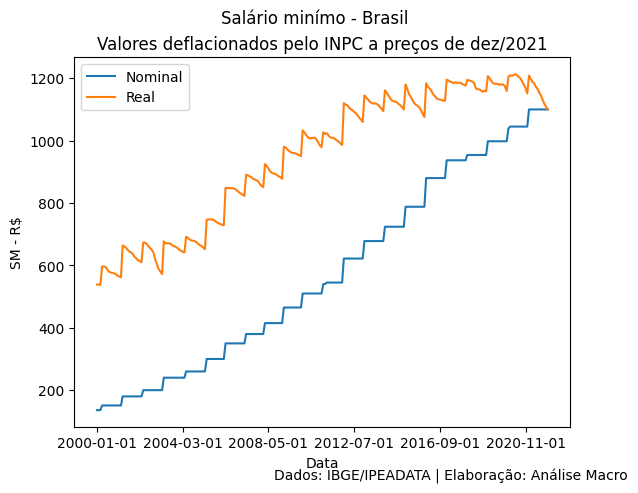

In [23]:
from matplotlib import pyplot as plt

axes = plt.gca() # cria um objeto de eixos
dados.plot(x= "data", y = ["salario_minimo", "real"], kind = "line", ax = axes) #gráfics de linha com eixos definidos
plt.title("Valores deflacionados pelo INPC a preços de dez/2021") #título
plt.suptitle("Salário minímo - Brasil") #subtítulo
plt.xlabel("Data")
plt.ylabel("SM - R$")
plt.legend(["Nominal", "Real"]) #legenda
plt.figtext( #fontes
            x = 0.99,
             y = 0.0005,
             s = "Dados: IBGE/IPEADATA | Elaboração: Análise Macro",
             horizontalalignment = "right"
)
plt.show() #mostra o gráfico